### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("recipe_dataset.csv")

In [3]:
df.shape

(48735, 14)

In [4]:
df.isna().sum()

Unnamed: 0          0
recipe_id           0
recipe_name         0
aver_rate           0
image_url           0
review_nums         0
calories            0
fat                 0
carbohydrates       0
protein             0
cholesterol         0
sodium              0
fiber               0
ingredients_list    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48735 entries, 0 to 48734
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        48735 non-null  int64  
 1   recipe_id         48735 non-null  int64  
 2   recipe_name       48735 non-null  object 
 3   aver_rate         48735 non-null  float64
 4   image_url         48735 non-null  object 
 5   review_nums       48735 non-null  int64  
 6   calories          48735 non-null  int64  
 7   fat               48735 non-null  int64  
 8   carbohydrates     48735 non-null  int64  
 9   protein           48735 non-null  int64  
 10  cholesterol       48735 non-null  int64  
 11  sodium            48735 non-null  int64  
 12  fiber             48735 non-null  int64  
 13  ingredients_list  48735 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 5.2+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,48735.0,24367.000000,14068.727021,0.0,12183.50,24367.00,36550.50,48734.0
recipe_id,48735.0,131840.514579,98524.853219,6663.0,22181.50,143114.00,231980.50,262956.0
aver_rate,48735.0,4.311393,0.484486,0.0,4.08,4.41,4.62,5.0
review_nums,48735.0,77.045696,284.401153,1.0,6.00,18.00,54.00,11191.0
calories,48735.0,16.422756,10.802746,0.0,9.00,15.00,22.00,235.0
fat,48735.0,25.601149,22.605484,0.0,10.00,20.00,35.00,591.0
carbohydrates,48735.0,10.152190,7.925232,0.0,4.00,9.00,14.00,280.0
protein,48735.0,27.651934,29.107178,0.0,7.00,16.00,43.00,920.0
cholesterol,48735.0,19.949338,24.684108,0.0,3.00,13.00,28.00,1344.0
sodium,48735.0,23.011224,50.872119,0.0,6.00,14.00,30.00,5285.0


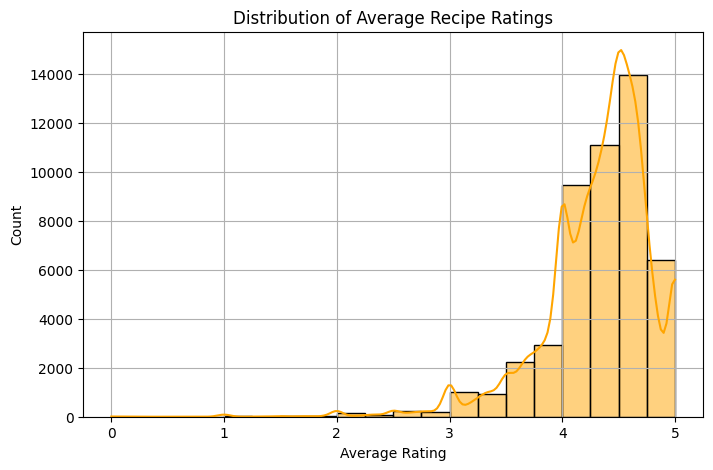

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['aver_rate'], bins=20, kde=True, color='orange')
plt.title('Distribution of Average Recipe Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

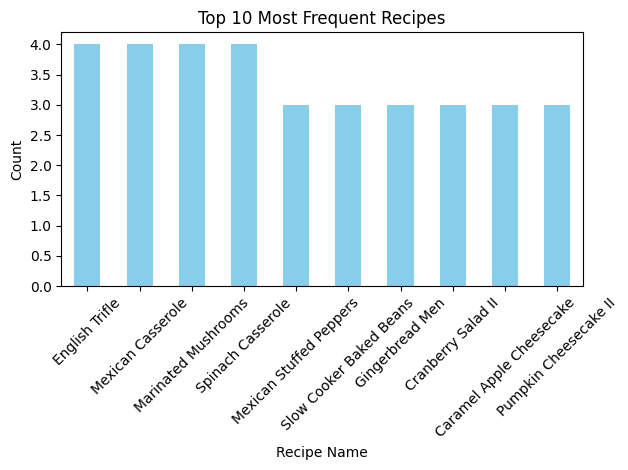

In [9]:
top_recipes = df['recipe_name'].value_counts().head(10)
top_recipes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Recipes')
plt.xlabel('Recipe Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


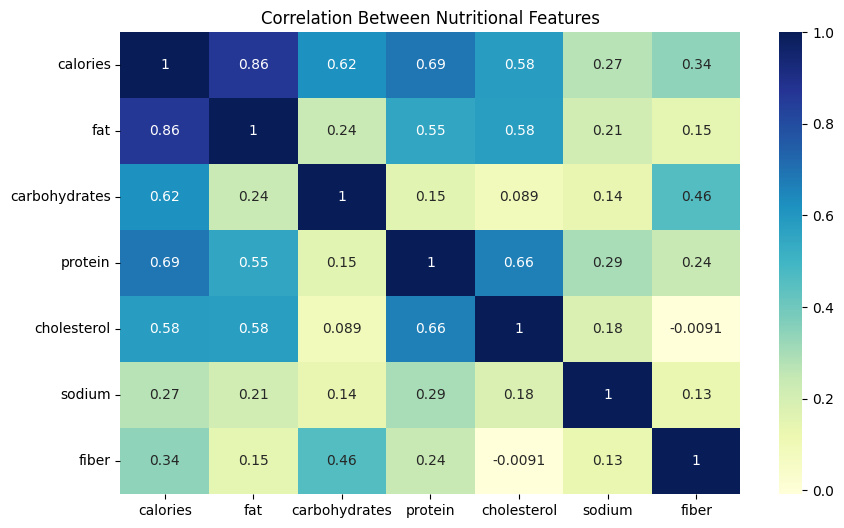

In [10]:
selected_nutrients = ['calories', 'fat', 'carbohydrates', 'protein', 'cholesterol', 'sodium', 'fiber']
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_nutrients].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Between Nutritional Features')
plt.show()

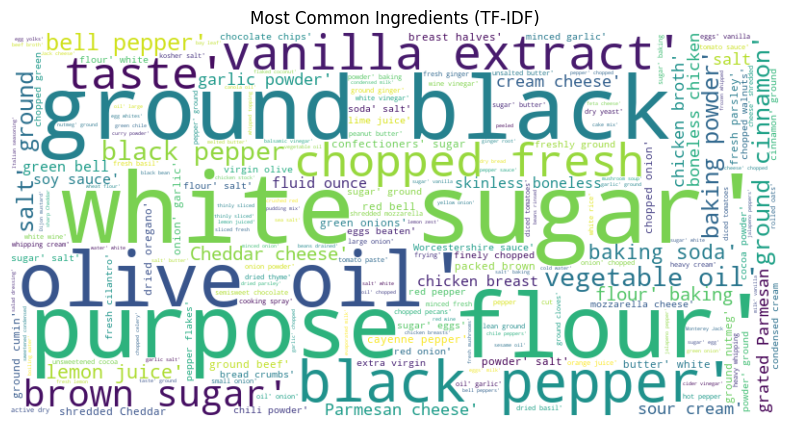

In [11]:
from wordcloud import WordCloud

text = " ".join(df['ingredients_list'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Ingredients (TF-IDF)')
plt.show()